### TF-IDF Vectorization Overview

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It is widely used in text mining, natural language processing (NLP), and information retrieval tasks.

The TF-IDF score is calculated by combining two components:

1. **Term Frequency (TF)**: This measures how frequently a term appears in a document. It's typically calculated as:

   \[
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
   \]

2. **Inverse Document Frequency (IDF)**: This measures how important a term is within the entire corpus. It is computed as:

   \[
   \text{IDF}(t) = \log \left(\frac{N}{\text{DF}(t)}\right)
   \]

   where \( N \) is the total number of documents, and \( \text{DF}(t) \) is the number of documents containing the term \( t \).

The final **TF-IDF** score is computed by multiplying the TF and IDF scores for a given term:

\[
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
\]


In [73]:
# Importing Libraries
import pandas as pd
import spacy
# Load spaCy's English tokenizer and lemmatizer
nlp = spacy.load("en_core_web_sm")   #spaCy's english tokenizer and lemmatizer


# this csv is a subset of  "https://www.kaggle.com/code/abdmental01/emotions-analysis-gru-94/input?select=text.csv"
# Load the dataset
data_path = '/content/Emotion_data.csv'  # Update the path as necessary
data = pd.read_csv(data_path, encoding='ISO-8859-1')

data.head(5)

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [74]:
data['label'].value_counts()

,count
label,
1,695
0,581
2,275
3,224


In [75]:

# 4 categories: sadness (0), joy (1), anger (2), fear (3).
data['sentiment'] = data['label'].replace({0: 'sadness', 1: 'joy', 2:'anger', 3:'fear'})
print(data.head(10))

                                                text  label sentiment
0  im feeling rather rotten so im not very ambiti...      0   sadness
1          im updating my blog because i feel shitty      0   sadness
2  i never make her separate from me because i do...      0   sadness
3  i left with my bouquet of red and yellow tulip...      1       joy
4    i was feeling a little vain when i did this one      0   sadness
5  i cant walk into a shop anywhere where i do no...      3      fear
6   i felt anger when at the end of a telephone call      2     anger
7  i explain why i clung to a relationship with a...      1       joy
8  i like to have the same breathless feeling as ...      1       joy
9  i jest i feel grumpy tired and pre menstrual w...      2     anger


In [76]:
# prepreocessing  (take around 5 to 10 minutes)
import spacy
nlp = spacy.load("en_core_web_sm")

tokens = []
for doc in nlp.pipe(data['text'], batch_size=500, disable=['ner', 'parser'], n_process=-1):
    tokens.append([token.lemma_ for token in doc if not token.is_punct])

data['preprocessed_sentiment'] = pd.Series(tokens).apply(lambda x: " ".join(x))
data['preprocessed_sentiment'].head(5)

,preprocessed_sentiment
0,I m feel rather rotten so I m not very ambitio...
1,I m update my blog because I feel shitty
2,I never make she separate from I because I don...
3,I leave with my bouquet of red and yellow tuli...
4,I be feel a little vain when I do this one


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=100000)
X = vectorizer.fit_transform(data['preprocessed_sentiment'])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.05, random_state=42, stratify=data['label'])

In [81]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1686, 3633) (1686,)
(89, 3633) (89,)


Accuracy: 68.54%


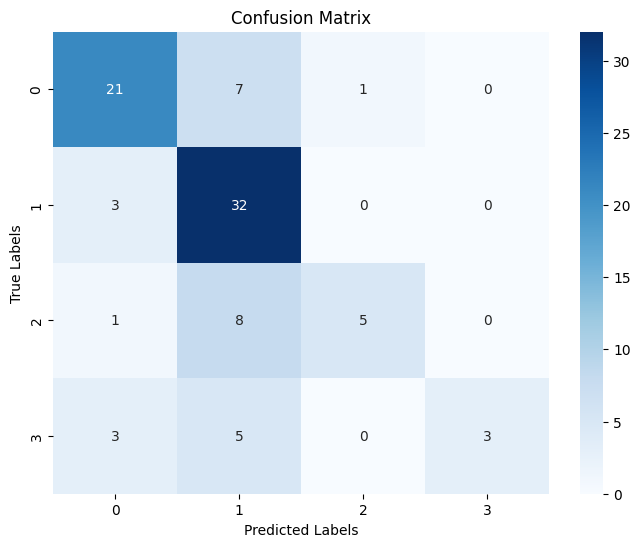


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.62      0.91      0.74        35
           2       0.83      0.36      0.50        14
           3       1.00      0.27      0.43        11

    accuracy                           0.69        89
   macro avg       0.80      0.57      0.60        89
weighted avg       0.74      0.69      0.66        89



In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
# print("Confusion Matrix:")
# print(cm)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 61.80%


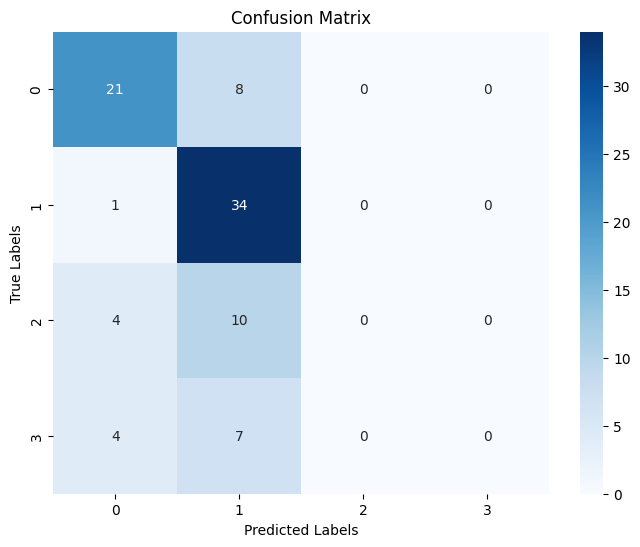


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.58      0.97      0.72        35
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        11

    accuracy                           0.62        89
   macro avg       0.32      0.42      0.36        89
weighted avg       0.45      0.62      0.52        89



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix:")
# print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))